<a href="https://colab.research.google.com/github/khushboo-yadav04/Food-Recognition-and-Calorie-Estimation-model/blob/main/Food_Recognition_and_Calorie_Estimation_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow opencv-python numpy matplotlib pillow

In [ ]:
food_calorie_estimator/
│
├── dataset/                # Images of food (each subfolder is a class)
│   ├── apple/
│   ├── banana/
│   └── burger/
│
├── food_calorie_map.json   # Food item → calorie dictionary
├── model.py                # Model training code
├── predict.py              # Prediction and calorie estimation
└── README.md

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# Calories per 100g (Approximate)
food_calories = {
    'pizza': 266,
    'cheeseburger': 303,
    'hotdog': 290,
    'apple': 52,
    'banana': 89,
    'carrot': 41,
    'cake': 350,
    'donut': 452,
    'french_fries': 312,
    'ice_cream': 207
}

In [ ]:
model = MobileNetV2(weights='imagenet')

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Saving pizaa.jpg to pizaa.jpg


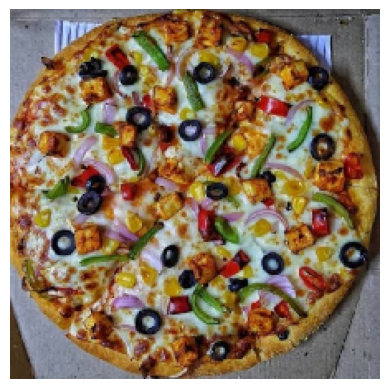

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    image_path = fn
    image = load_img(image_path, target_size=(224, 224))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    img_array = img_to_array(image)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)


In [ ]:
predictions = model.predict(img_preprocessed)
decoded = decode_predictions(predictions, top=3)[0]

print("🔎 Top Predictions:")
for i, (id, label, prob) in enumerate(decoded):
    print(f"{i+1}. {label} ({prob*100:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
🔎 Top Predictions:
1. pizza (98.01%)
2. bagel (0.12%)
3. tray (0.11%)


In [ ]:
# Try to map prediction to your calorie dictionary
predicted_label = decoded[0][1].lower().replace(' ', '_')

if predicted_label in food_calories:
    calories = food_calories[predicted_label]
    print(f"\n🍽 Predicted Food: {predicted_label.replace('_', ' ').title()}")
    print(f"🔥 Estimated Calories: {calories} kcal per 100g")
else:
    print(f"\n⚠️ '{predicted_label}' not found in calorie database. Please add it.")



🍽 Predicted Food: Pizza
🔥 Estimated Calories: 266 kcal per 100g


Saving burger.jpg to burger.jpg


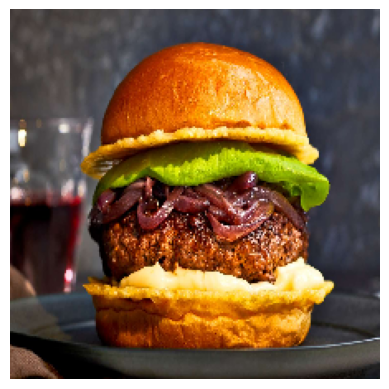

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    image_path = fn
    image = load_img(image_path, target_size=(224, 224))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    img_array = img_to_array(image)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)

In [ ]:
predictions = model.predict(img_preprocessed)
decoded = decode_predictions(predictions, top=3)[0]

print("🔎 Top Predictions:")
for i, (id, label, prob) in enumerate(decoded):
    print(f"{i+1}. {label} ({prob*100:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
🔎 Top Predictions:
1. cheeseburger (96.12%)
2. guacamole (0.41%)
3. meat_loaf (0.28%)


In [ ]:
predicted_label = decoded[0][1].lower().replace(' ', '_')

if predicted_label in food_calories:
    calories = food_calories[predicted_label]
    print(f"\n🍽 Predicted Food: {predicted_label.replace('_', ' ').title()}")
    print(f"🔥 Estimated Calories: {calories} kcal per 100g")
else:
    print(f"\n⚠️ '{predicted_label}' not found in calorie database. Please add it.")


🍽 Predicted Food: Cheeseburger
🔥 Estimated Calories: 303 kcal per 100g
